In [32]:
# import libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree

In [2]:
# loading data
pima=pd.read_csv("datasets\diabetes.csv")


In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
pima.shape

(768, 9)

In [7]:
pima.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [8]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
# feature selection
# split dataset in features and target variable
feature_cols = [
    "Pregnancies",
    "Insulin",
    "BMI",
    "Age",
    "Glucose",
    "BloodPressure",
    "DiabetesPedigreeFunction",
]
X = pima[feature_cols]  # Features
y = pima.Outcome  # Target variable



In [20]:
# Splitting Data
# Split dataset into training set and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [21]:
# Building Decision Tree Model
# Create Decision Tree classifer object
clf=DecisionTreeClassifier()

In [22]:
# Train Decision Tree Classifer
clf=clf.fit(X_train,y_train)

In [23]:
# Predict the response for test dataset
y_pred=clf.predict(X_test)

In [24]:
# Evaluating the Model
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.683982683982684


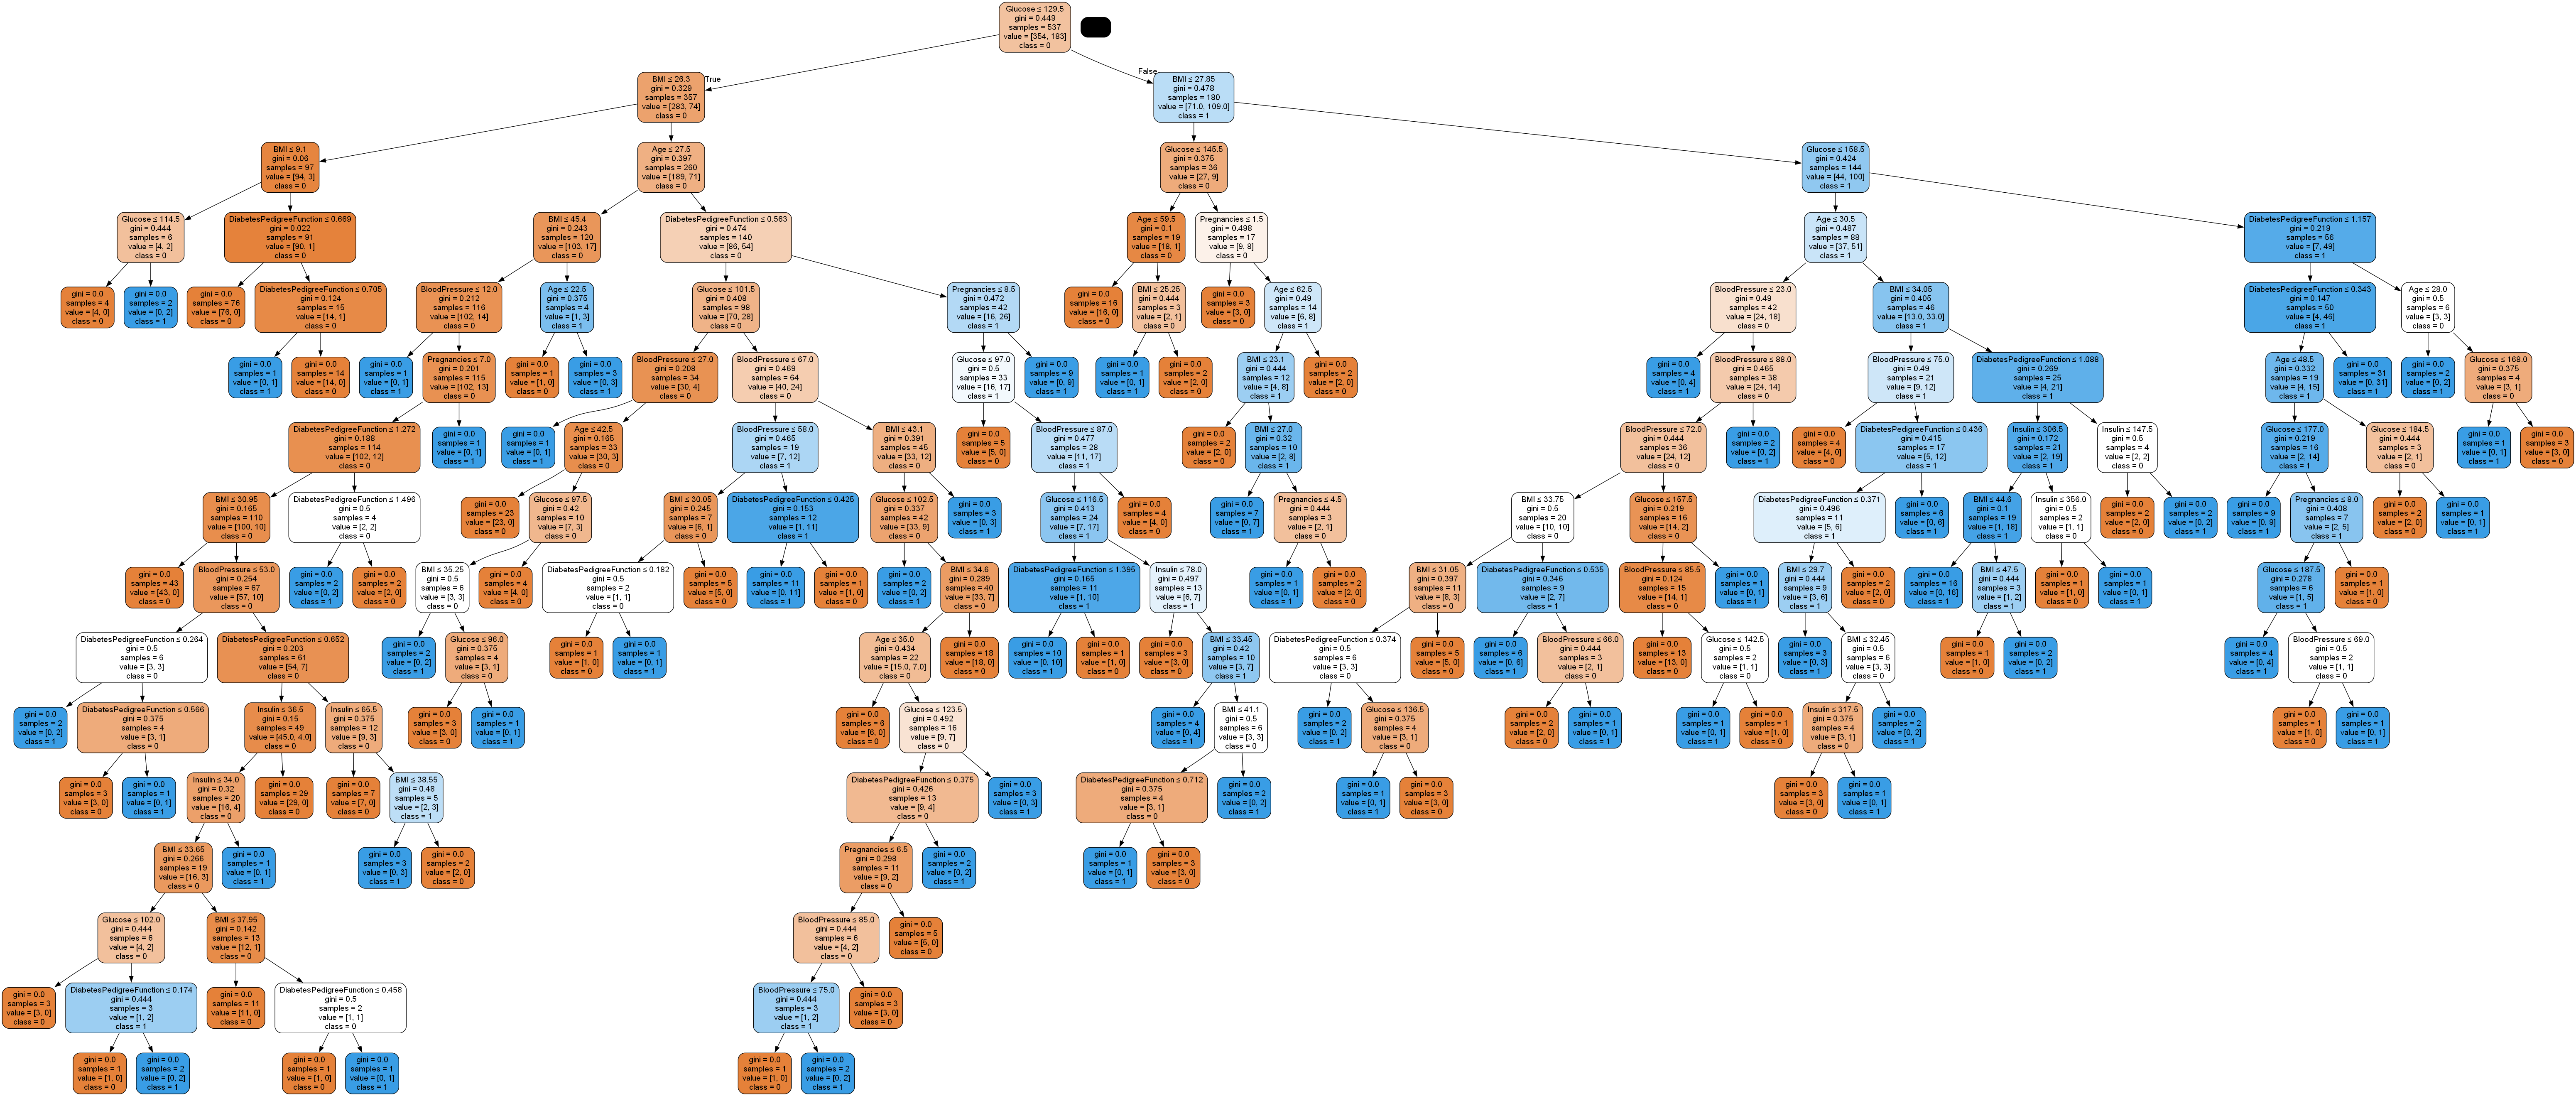

In [25]:
# Visualizing Decision Trees
dot_data = StringIO()
export_graphviz(
    clf,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=feature_cols,
    class_names=["0", "1"],
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("diabetes.png")
Image(graph.create_png())


### Optimizing Decision Tree Performance

In [27]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7705627705627706


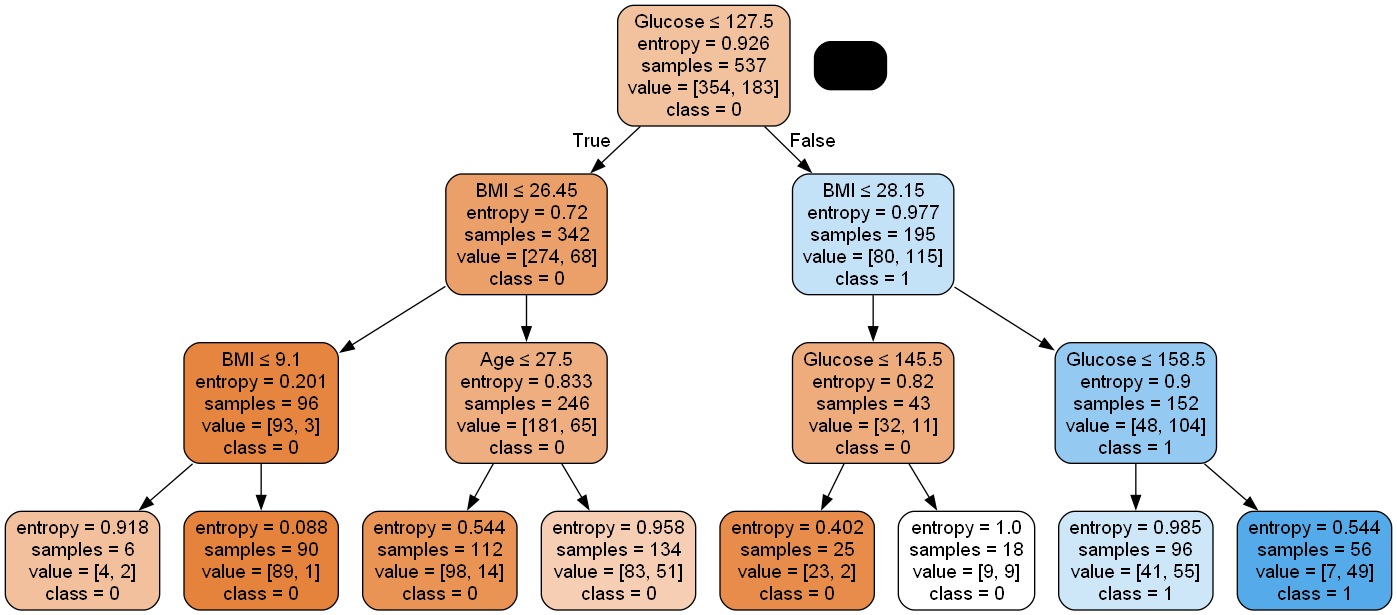

In [28]:
# Visualizing Decision Trees
dot_data = StringIO()
export_graphviz(
    clf,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=feature_cols,
    class_names=["0", "1"],
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("diabetes.png")
Image(graph.create_png())


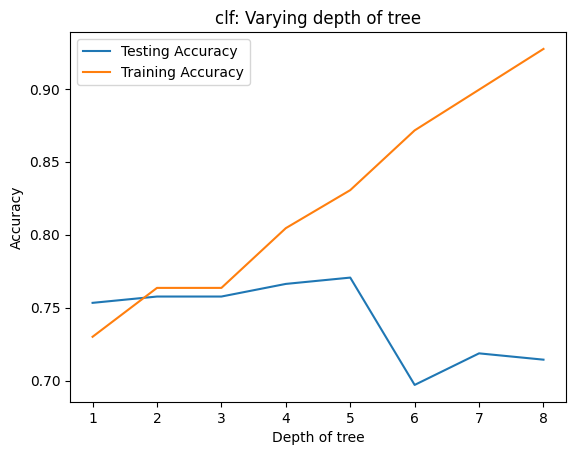

In [33]:
# Setup arrays to store train and test accuracies
dep = np.arange(1, 9)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a Decision Tree Classifier
    clf = tree.DecisionTreeClassifier(max_depth=k)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Compute accuracy on the training set
    train_accuracy[i] = clf.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = clf.score(X_test, y_test)

# Generate plot
plt.title("clf: Varying depth of tree")
plt.plot(dep, test_accuracy, label="Testing Accuracy")
plt.plot(dep, train_accuracy, label="Training Accuracy")
plt.legend()
plt.xlabel("Depth of tree")
plt.ylabel("Accuracy")
plt.show()
